In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.3 MB/s eta 0:00:00


In [3]:
import requests
import pyreadstat

# Download the file
url = "https://github.com/kflisikowski/ds/blob/master/bank_defaults.sav?raw=true"
response = requests.get(url)
with open("bank_defaults.sav", "wb") as f:
    f.write(response.content)

# Read the .sav file
df, meta = pyreadstat.read_sav("bank_defaults.sav")

# Remove rows with missing values
df = df.dropna()

# Convert 'default' column to factor
df['def'] = df['default'].astype('category')

# Convert 'ed' column to factor
df['educ'] = df['ed'].astype('category')

df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,preddef1,preddef2,preddef3,def,educ
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0,0.808394,0.788640,0.213043,1.0,3.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0,0.198297,0.128445,0.436903,0.0,1.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0,0.010036,0.002987,0.141023,0.0,1.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0,0.022138,0.010273,0.104422,0.0,1.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0,0.781588,0.737885,0.436903,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,36.0,2.0,6.0,15.0,27.0,4.6,0.262062,0.979938,1.0,0.051703,0.053386,0.127274,1.0,2.0
696,29.0,2.0,6.0,4.0,21.0,11.5,0.369495,2.045505,0.0,0.206713,0.265626,0.265589,0.0,2.0
697,33.0,1.0,15.0,3.0,32.0,7.6,0.491264,1.940736,0.0,0.023627,0.007908,0.177931,0.0,1.0
698,45.0,1.0,19.0,22.0,77.0,8.4,2.302608,4.165392,0.0,0.005899,0.003735,0.193858,0.0,1.0


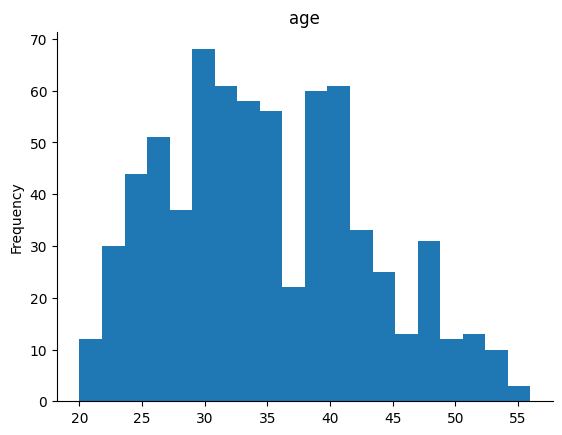

In [4]:
# Let's visualize ages first
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# First scale income by logarithm
df['log_income'] = np.log(df['income'])
df["log_income"]

0      5.170484
1      3.433987
2      4.007333
3      4.787492
4      3.332205
         ...   
695    3.295837
696    3.044522
697    3.465736
698    4.343805
699    3.784190
Name: log_income, Length: 700, dtype: float64

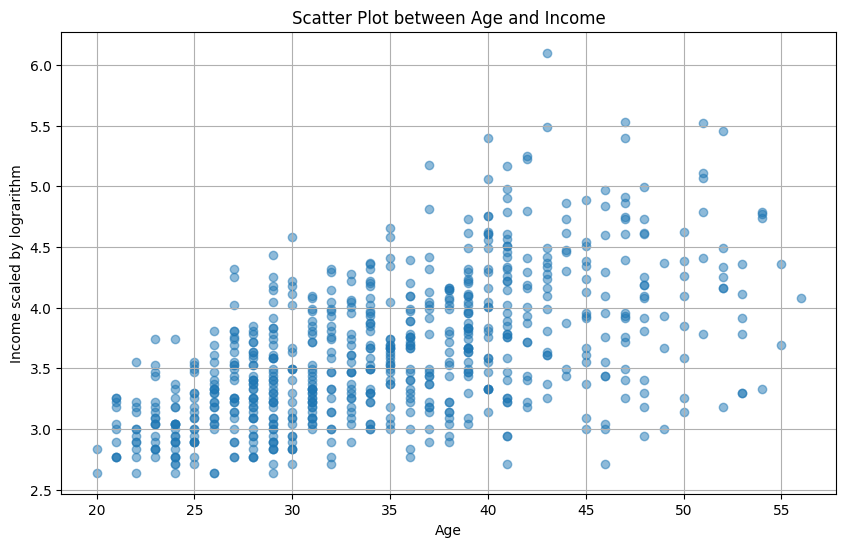

In [6]:
# Remove rows with missing values
df = df.dropna()

df['def'] = df['default'].astype('category')
df['educ'] = df['ed'].astype('category')

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df["log_income"], alpha=0.5)
plt.title('Scatter Plot between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income scaled by lograrithm')
plt.grid(True)
plt.show()

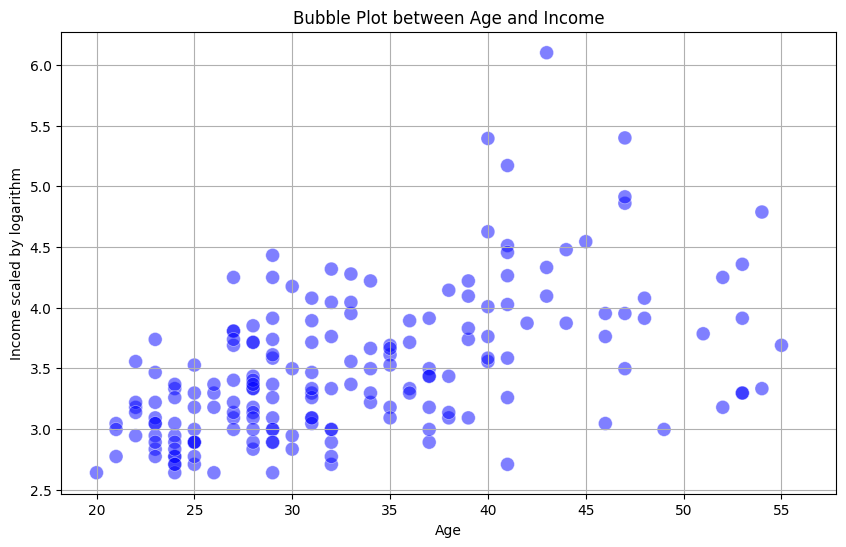

In [7]:
# Now let's make bubble plot (for fun :) )

bubble_size = df['default'].astype(float) * 100  # Scale sizes for visibility

# Create bubble plot between age and log_income
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['log_income'], s=bubble_size, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
plt.title('Bubble Plot between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income scaled by logarithm')
plt.grid(True)
plt.show()

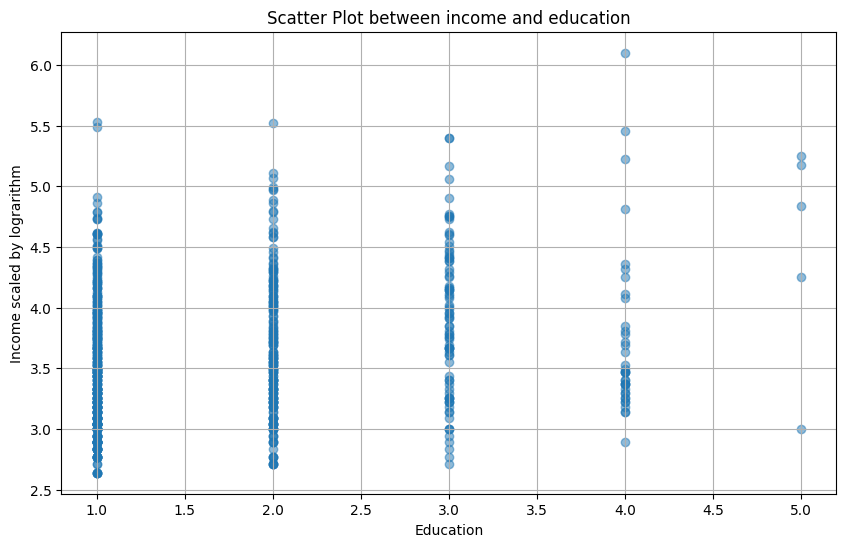

In [8]:
# Remove rows with missing values
df = df.dropna()

df['def'] = df['default'].astype('category')
df['educ'] = df['ed'].astype('category')

plt.figure(figsize=(10, 6))
plt.scatter(df['educ'], df["log_income"], alpha=0.5)
plt.title('Scatter Plot between income and education')
plt.xlabel('Education')
plt.ylabel('Income scaled by lograrithm')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

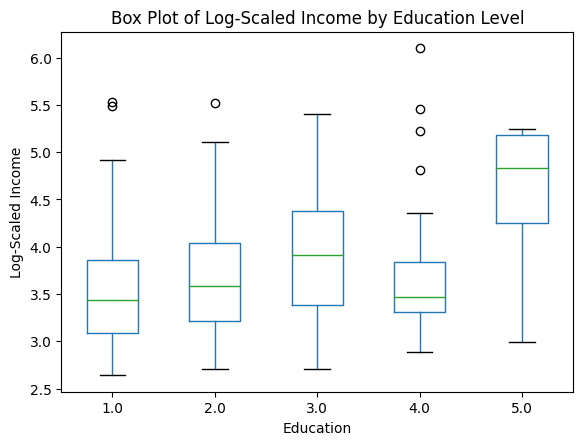

In [9]:
# To make it more visible we will use Box Plot!
plt.figure(figsize=(10, 6))
df.boxplot(column='log_income', by='educ', grid=False)
plt.title('Box Plot of Log-Scaled Income by Education Level')
plt.suptitle('')
plt.xlabel('Education')
plt.ylabel('Log-Scaled Income')
plt.show()

In [13]:
# Corelation matrix, heatmap for anything interesting
df.keys()

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default', 'preddef1', 'preddef2', 'preddef3', 'def', 'educ',
       'log_income'],
      dtype='object')

## Heatmap

Let's create a heatmap to see the correlations between each column.

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default', 'preddef1', 'preddef2', 'preddef3'],
      dtype='object')


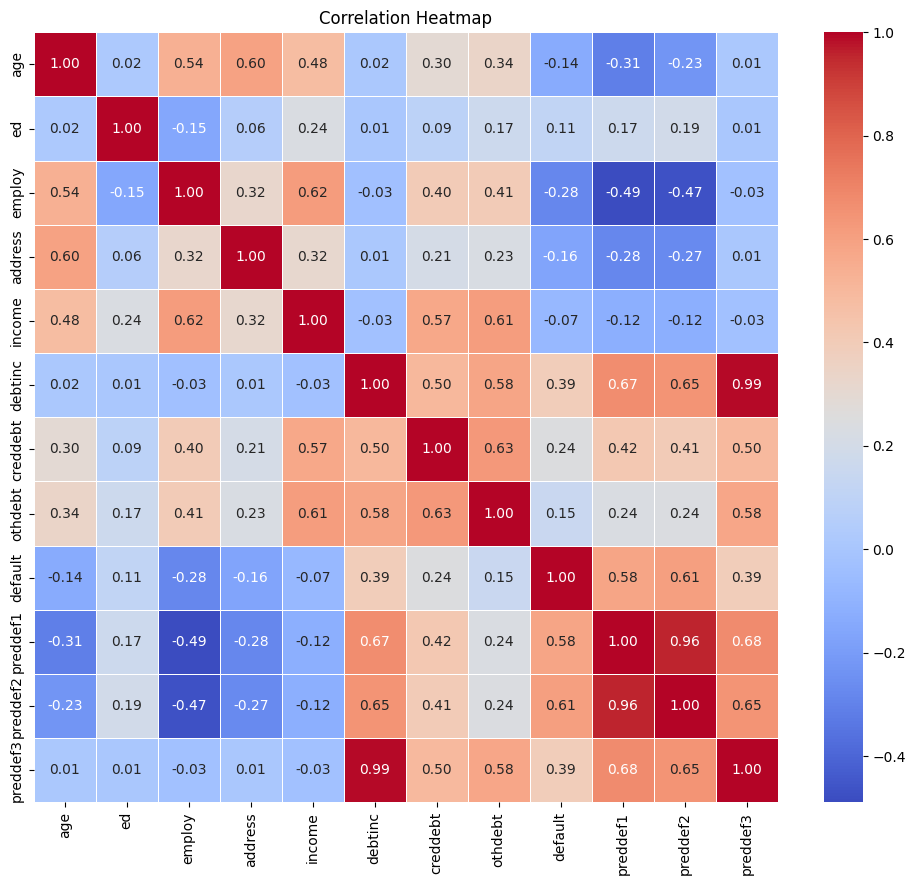

In [21]:
import seaborn as sns

columns = df.keys()[:-3] # Skip educ, log_income and log_income def
print(columns)

df_subset = df[columns]
correlation_matrix = df_subset.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Conclusion: now we are able to easily interpret which columns have strong corelations with others.

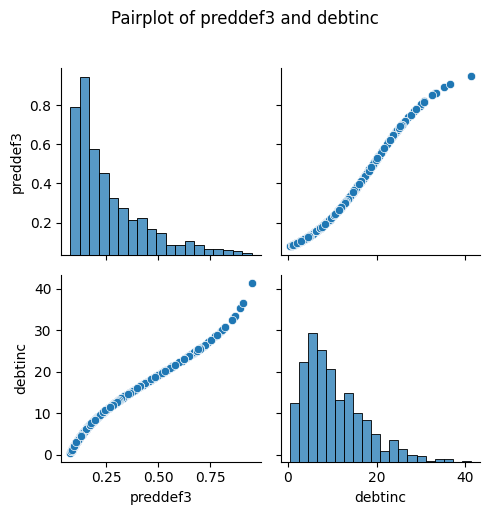

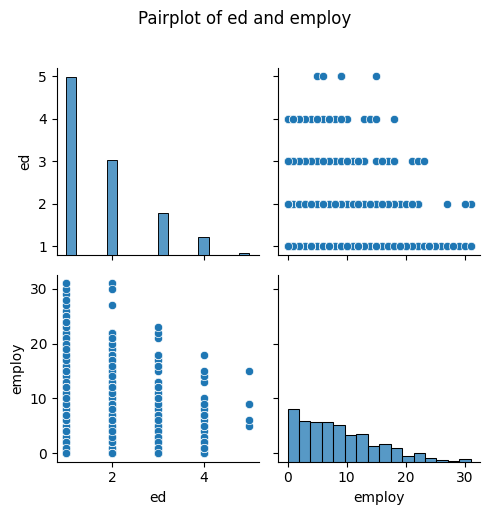

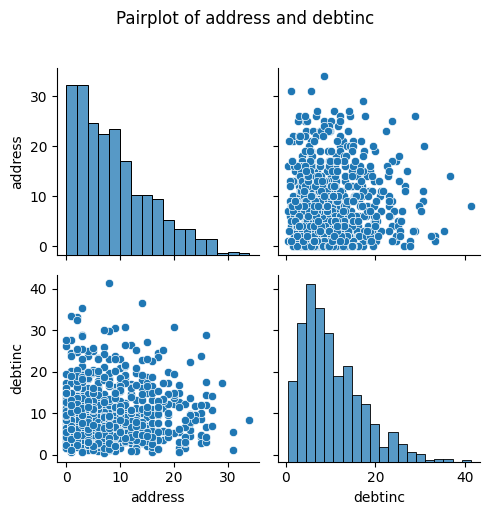

In [27]:
df_subset_2 = df[["preddef3", "debtinc"]]
df_subset_3 = df[["ed", "employ"]]
df_subset_4 = df[["address", "debtinc"]]

subsets = [df_subset_2, df_subset_3, df_subset_4]

for subset in subsets:
    pairplot = sns.pairplot(subset)
    pairplot.fig.suptitle(f"Pairplot of {subset.columns[0]} and {subset.columns[1]}", y=1.02)  # Adjust the title
    plt.tight_layout()
    plt.show()

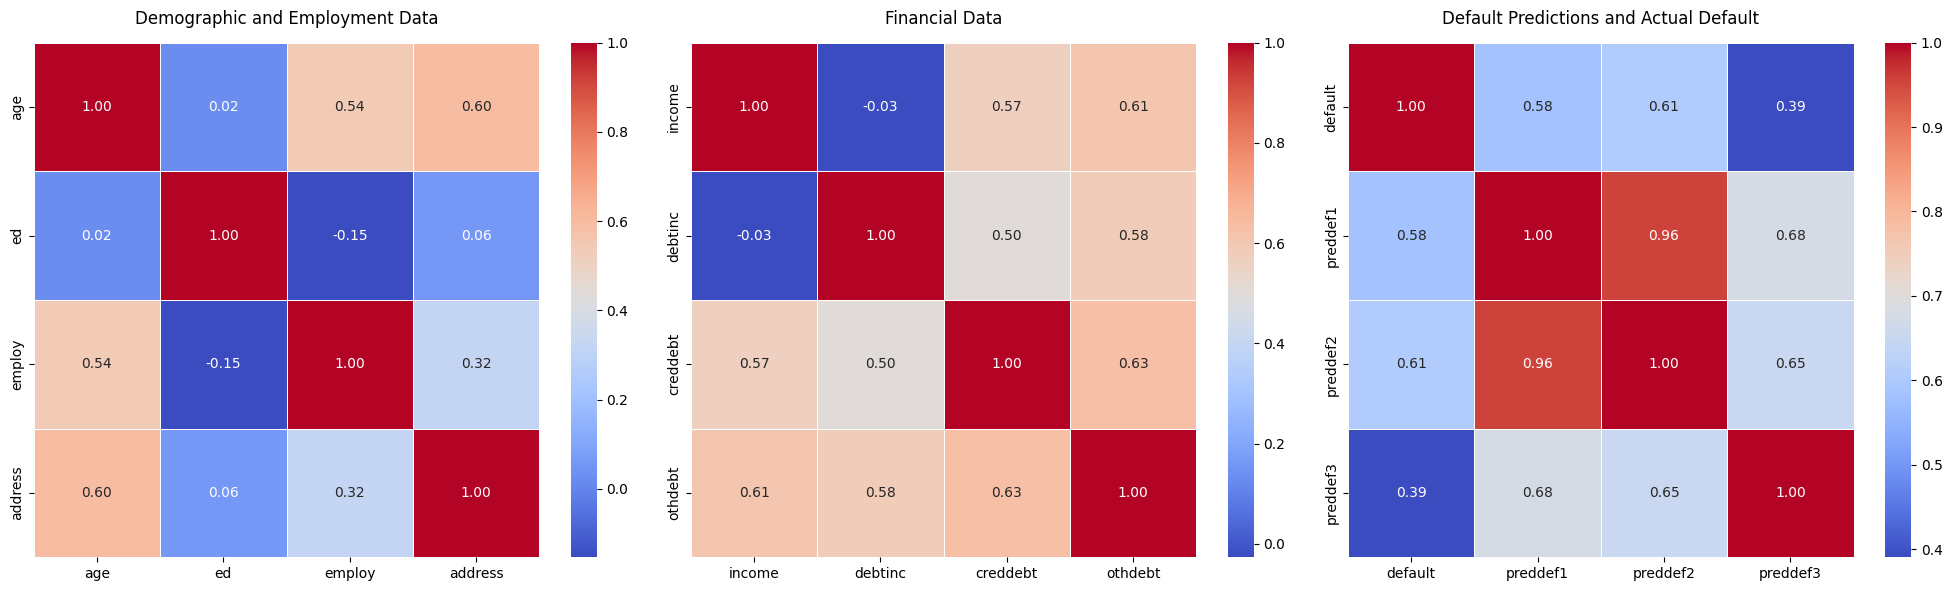

In [29]:
# Subsets of interest
demographic_employment_columns = ['age', 'ed', 'employ', 'address']
financial_columns = ['income', 'debtinc', 'creddebt', 'othdebt']
default_predictions_columns = ['default', 'preddef1', 'preddef2', 'preddef3']

# List of subsets and their titles
subsets = [
    (demographic_employment_columns, "Demographic and Employment Data"),
    (financial_columns, "Financial Data"),
    (default_predictions_columns, "Default Predictions and Actual Default")
]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for ax, (columns, title) in zip(axes, subsets):
    df_subset = df[columns]
    correlation_matrix = df_subset.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax)
    # Set the title for each subplot
    ax.set_title(title, y=1.02)

plt.tight_layout()
plt.show()